# Jenny Tran Final Assignment Part 1 Home Ownership Data

#### Import required packages

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

#### Import the data

The dataset set shows nineteen columns. The "RELEASENUMBER" column shows replicate values for all, indicating that all of this information comes from the set. The "familyid" column is an identifier for each household. The "hhsize"column represents the size of the household. Columns "age" and "age2" is possibly shows the age of the person whose name is on the house. "Lifesatis" indicated the life satisfaction of the individuals, where higher values show a higher levels of satisfaction. "Dwellingunit" could represent the different type of dwelling unit each family resides in. "Employmnt" represents the employment status of the household. "Salaryamt" indicates the income the household earns anually. "Numbercars" show the number of cars that each household has. "Logage" seems to be the natural logarithm of the age of the individuals. The columns "ownhome", "owncar", "ownbusiness", "healthins", "collegeeduc", "highlifesatis", "worknow", and "retired" are all binary and indicated true or false for each column. A "0" represents false and "1" for true. 

In [53]:
df_home = pd.read_csv('home_ownership.csv')

df_home.head()

,RELEASENUMBER,familyid,hhsize,age,lifesatis,dwellingunit,ownhome,employmnt,salaryamnt,owncar,numbercars,ownbusiness,healthins,collegeeduc,highlifesatis,age2,logage,worknow,retired
0,2,5620,1,59,2,3,0,5,0.0,1,1,0,1,0,1,59,4.077538,0,0
1,2,8559,1,57,2,1,1,1,0.0,1,3,0,1,0,1,57,4.043051,1,0
2,2,6510,1,43,3,3,0,5,0.0,0,0,0,1,0,0,43,3.761200,0,0
3,2,9172,1,42,3,1,0,1,0.0,1,1,1,0,0,0,42,3.737670,1,0
4,2,7682,4,27,3,2,0,1,0.0,1,1,0,1,0,0,27,3.295837,1,0


#### Change the name of columns to make the data more easier to understand

A few of the column names were unnecessarily long or confusing. The column "worknow" was modified to "employed" to be consistent with the naming convention across the dataset. The column "salaryamnt" was shortened to "salary". It was simplified to improve readability. The names of the columns were changed so that the dataset would be easier to understand for anyone viewing the data. They help avoid confusion and misinterpretation of the data. 

In [54]:
df_home.rename(columns = {'employmnt': 'employstatus','salaryamnt': 'salary','worknow': 'employed'}, inplace = True)

In [55]:
df_home.head()

,RELEASENUMBER,familyid,hhsize,age,lifesatis,dwellingunit,ownhome,employstatus,salary,owncar,numbercars,ownbusiness,healthins,collegeeduc,highlifesatis,age2,logage,employed,retired
0,2,5620,1,59,2,3,0,5,0.0,1,1,0,1,0,1,59,4.077538,0,0
1,2,8559,1,57,2,1,1,1,0.0,1,3,0,1,0,1,57,4.043051,1,0
2,2,6510,1,43,3,3,0,5,0.0,0,0,0,1,0,0,43,3.761200,0,0
3,2,9172,1,42,3,1,0,1,0.0,1,1,1,0,0,0,42,3.737670,1,0
4,2,7682,4,27,3,2,0,1,0.0,1,1,0,1,0,0,27,3.295837,1,0


#### Delete columns with replicate values 

The "RELEASENUMBER" column contains the same value for all columns. This probably means that the homes were apart of the same set. The column can be dropped because it does not add any unique information to the data. 

In [56]:
df_home.drop('RELEASENUMBER', inplace=True, axis=1)

#### Delete duplicate columns
After getting closer look at the dataset, it appears that two columns contained the same information. The columns "age" and "age2" stored identical values. The column "age2" is deleted because duplicate columns columns can consume storage space, making the dataset larger than it needs to be. Multiple columns with the same information can be confusing to look at.

In [57]:
df_home.drop('age2', inplace=True, axis=1)

In [58]:
df_home.head()

,familyid,hhsize,age,lifesatis,dwellingunit,ownhome,employstatus,salary,owncar,numbercars,ownbusiness,healthins,collegeeduc,highlifesatis,logage,employed,retired
0,5620,1,59,2,3,0,5,0.0,1,1,0,1,0,1,4.077538,0,0
1,8559,1,57,2,1,1,1,0.0,1,3,0,1,0,1,4.043051,1,0
2,6510,1,43,3,3,0,5,0.0,0,0,0,1,0,0,3.761200,0,0
3,9172,1,42,3,1,0,1,0.0,1,1,1,0,0,0,3.737670,1,0
4,7682,4,27,3,2,0,1,0.0,1,1,0,1,0,0,3.295837,1,0


#### Check dataset info to make sure that there are not any missing values in the columns and to check datatypes

The next step of the data wrangling process is to check to see if any values are missing in the columns and to check the datatypes to make sure they are correct. The data information reveals that there are not any columns that have missing information or incorrect datatypes. Therefore, the process of visualizing the data can begin.

In [59]:
df_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9607 entries, 0 to 9606
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   familyid       9607 non-null   int64  
 1   hhsize         9607 non-null   int64  
 2   age            9607 non-null   int64  
 3   lifesatis      9607 non-null   int64  
 4   dwellingunit   9607 non-null   int64  
 5   ownhome        9607 non-null   int64  
 6   employstatus   9607 non-null   int64  
 7   salary         9607 non-null   float64
 8   owncar         9607 non-null   int64  
 9   numbercars     9607 non-null   int64  
 10  ownbusiness    9607 non-null   int64  
 11  healthins      9607 non-null   int64  
 12  collegeeduc    9607 non-null   int64  
 13  highlifesatis  9607 non-null   int64  
 14  logage         9607 non-null   float64
 15  employed       9607 non-null   int64  
 16  retired        9607 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 1.2 MB


#### Data Visualization

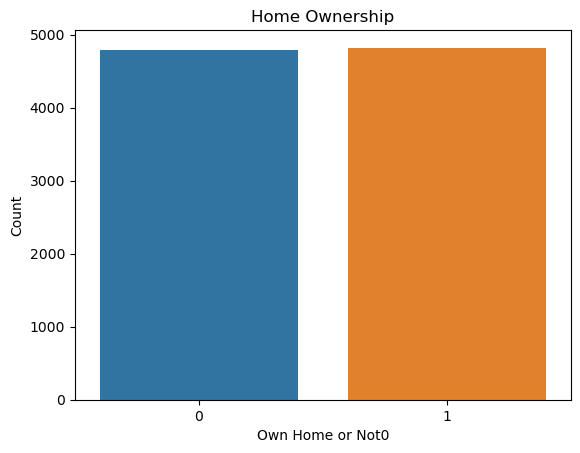

In [60]:
# Create a count plot to show the people who do or do not own the home

sns.countplot(x='ownhome', data=df_home)
plt.xticks(rotation= 360)

plt.title('Home Ownership')
plt.xlabel('Own Home or Not0')
plt.ylabel('Count')
plt.show()

#### Create a seperate dataset to store information on individuals who own homes and those who don't

Another dataset is created to seperate the information on people that own homes. It can be used to identify if whether owning a home has an effect on other factors. 

In [61]:
df_homeowners = df_home.loc[df_home["ownhome"] != 0]
df_homeowners.shape

(4822, 17)

In [62]:
df_nothomeowners = df_home.loc[df_home["ownhome"] != 1]
df_nothomeowners.shape

(4785, 17)

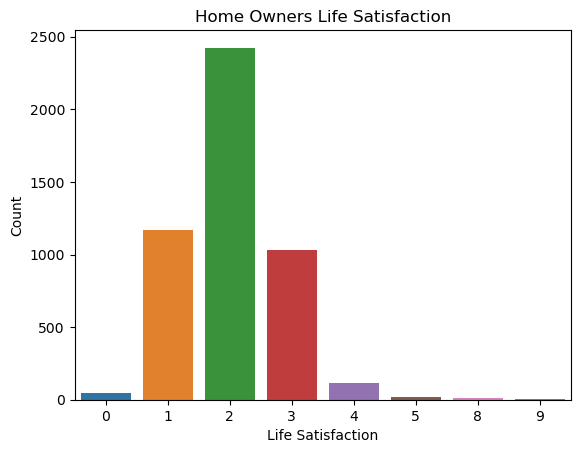

In [63]:
sns.countplot(x='lifesatis', data=df_homeowners)
plt.xticks(rotation= 360)

plt.title('Home Owners Life Satisfaction')
plt.xlabel('Life Satisfaction')
plt.ylabel('Count')
plt.show()

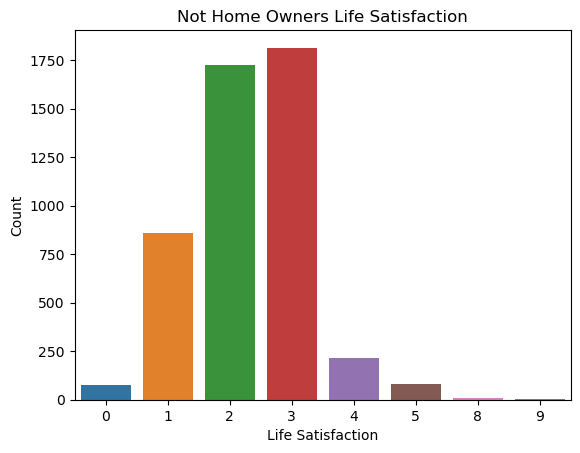

In [64]:
sns.countplot(x='lifesatis', data=df_nothomeowners)
plt.xticks(rotation= 360)

plt.title('Not Home Owners Life Satisfaction')
plt.xlabel('Life Satisfaction')
plt.ylabel('Count')
plt.show()

These two countplots show that people who do or do not own a home have a similar life satisfaction.

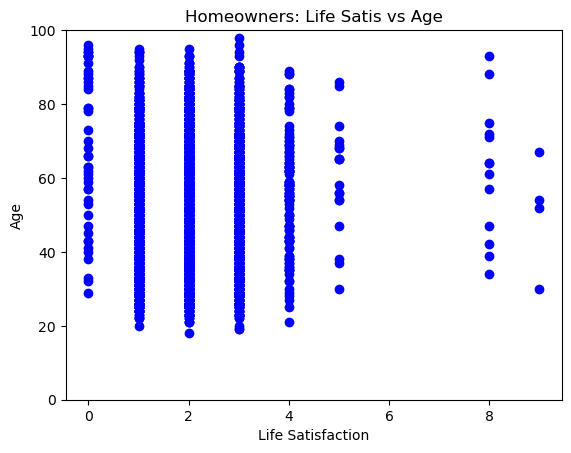

In [65]:
plt.scatter(df_homeowners['lifesatis'], df_homeowners['age'], color='blue')
plt.title('Homeowners: Life Satis vs Age')
plt.xlabel('Life Satisfaction')
plt.ylim (0,100)
plt.ylabel('Age')

plt.show()

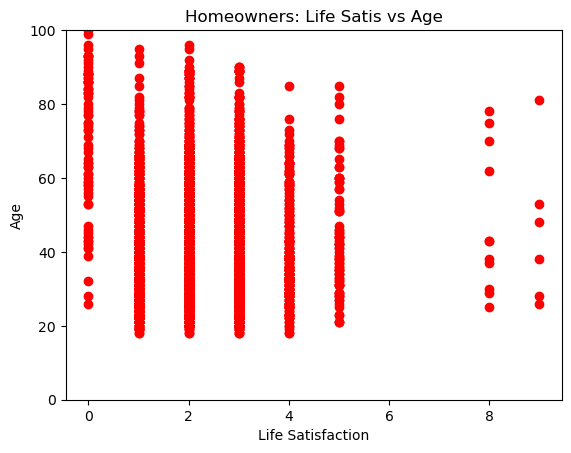

In [66]:
plt.scatter(df_nothomeowners['lifesatis'], df_nothomeowners['age'], color='red')
plt.title('Homeowners: Life Satis vs Age')
plt.xlabel('Life Satisfaction')
plt.ylim (0,100)
plt.ylabel('Age')

plt.show()

These two scatterplot shows that life satisfaction amongst people of similar age ranges are the same for both homeowners and individuals who do not own the homes. 

#### Create a correlation matrix to show the relationship between all the variables

In [67]:
correlation_matrix = df_home.corr()

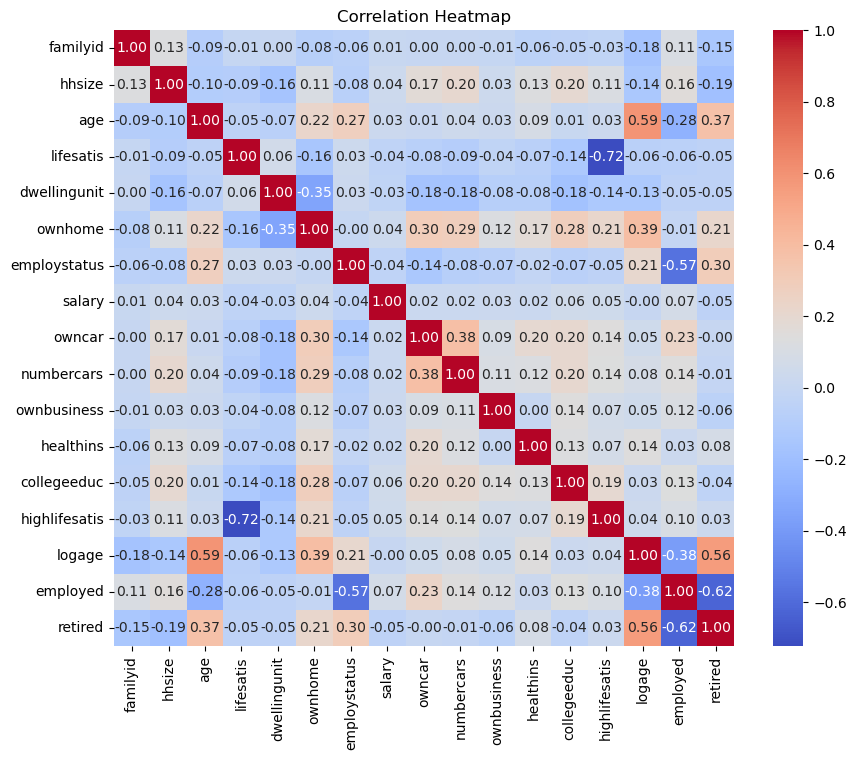

In [68]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The correlation matrix shows that there a very few strong correlations between the variables.

In [71]:
correlation_matrix = df_home.corr()
correlation_with_target = correlation_matrix['lifesatis'].abs().sort_values(ascending=False)
print(correlation_with_target)

lifesatis        1.000000
highlifesatis    0.722520
ownhome          0.157148
collegeeduc      0.135449
numbercars       0.094190
hhsize           0.091099
owncar           0.076327
healthins        0.069187
logage           0.064089
dwellingunit     0.063851
employed         0.060183
retired          0.049322
age              0.045155
salary           0.042206
ownbusiness      0.036131
employstatus     0.032397
familyid         0.007387
Name: lifesatis, dtype: float64


This shows a better view of the correlation between life satisfaction and other variables.